In [21]:
import numpy as np
import pandas as pd

In [22]:
# import data
ionosphere = pd.read_csv("data/ionosphere/ionosphere.data", header = None)
ionosphere.head(3)

0   1        2        3        4        5        6        7        8   \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   

        9   ...       25       26       27       28       29       30  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   

        31       32       33  34  
0 -0.54487  0.18641 -0.45300   g  
1 -0.06288 -0.13738 -0.02447   b  
2 -0.24180  0.56045 -0.38238   g  

[3 rows x 35 columns]

#### Divide in train and test datasets

In [23]:
X = ionosphere.drop(columns=34)
y = ionosphere[34]

#### Transform classes to binary 1/0

In [24]:
y.loc[y == 'g'] = 1
y.loc[y == 'b'] = 0

ionosphere[34].loc[ionosphere[34]=='g'] = 1
ionosphere[34].loc[ionosphere[34]=='b'] = 0

y.head(5)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0    1
1    0
2    1
3    0
4    1
Name: 34, dtype: int64

#### Analyzing the data

In [25]:
ionosphere.dtypes

0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34      int64
dtype: object

In [26]:
ionosphere.describe()

0      1           2           3           4           5   \
count  351.000000  351.0  351.000000  351.000000  351.000000  351.000000   
mean     0.891738    0.0    0.641342    0.044372    0.601068    0.115889   
std      0.311155    0.0    0.497708    0.441435    0.519862    0.460810   
min      0.000000    0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000    0.0    0.472135   -0.064735    0.412660   -0.024795   
50%      1.000000    0.0    0.871110    0.016310    0.809200    0.022800   
75%      1.000000    0.0    1.000000    0.194185    1.000000    0.334655   
max      1.000000    0.0    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          25  \
count  351.000000  351.000000  351.000000  351.000000  ...  351.000000   
mean     0.550095    0.119360    0.511848    0.181345  ...   -0.071187   
std      0.492654    0.520750    0.507066    0.483851  ...    0.508495   
min     -1.000000   -1.000000   -1.000000   -1.000000  ...   -1.000000   
25%      0.211310   -0.054840    0.087110   -0.048075  ...   -0.332390   
50%      0.728730    0.014710    0.684210    0.018290  ...   -0.015050   
75%      0.969240    0.445675    0.953240    0.534195  ...    0.156765   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

               26          27          28          29          30          31  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     0.541641   -0.069538    0.378445   -0.027907    0.352514   -0.003794   
std      0.516205    0.550025    0.575886    0.507974    0.571483    0.513574   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%      0.286435   -0.443165    0.000000   -0.236885    0.000000   -0.242595   
50%      0.708240   -0.017690    0.496640    0.000000    0.442770    0.000000   
75%      0.999945    0.153535    0.883465    0.154075    0.857620    0.200120   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               32          33          34  
count  351.000000  351.000000  351.000000  
mean     0.349364    0.014480    0.641026  
std      0.522663    0.468337    0.480384  
min     -1.000000   -1.000000    0.000000  
25%      0.000000   -0.165350    0.000000  
50%      0.409560    0.000000    1.000000  
75%      0.813765    0.171660    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 35 columns]

In [27]:
ionosphere.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

### No preprocessing and no encoding needed as all data types are numeric and there are no null/categorical values
##### Scaling can be considered

In [28]:
# Basic statistics
numPositive, numNegative = ionosphere[34].value_counts()
numPositive / numNegative

1.7857142857142858

In [29]:
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

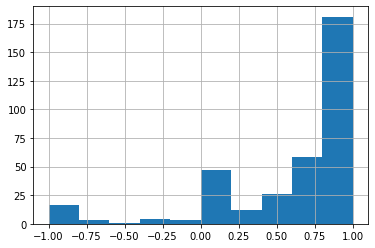

In [30]:
#create histogram
ionosphere[4].hist()

In [31]:
#numerical corr
ionosphere.corr()

0   1         2         3         4         5         6         7   \
0   1.000000 NaN  0.302034 -0.006529  0.156152  0.127606  0.221867  0.027079   
1        NaN NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2   0.302034 NaN  1.000000  0.143365  0.476587  0.025768  0.440254  0.008717   
3  -0.006529 NaN  0.143365  1.000000  0.001152 -0.190308 -0.054030  0.255003   
4   0.156152 NaN  0.476587  0.001152  1.000000  0.038323  0.597075 -0.029794   
5   0.127606 NaN  0.025768 -0.190308  0.038323  1.000000 -0.010227  0.274747   
6   0.221867 NaN  0.440254 -0.054030  0.597075 -0.010227  1.000000 -0.150424   
7   0.027079 NaN  0.008717  0.255003 -0.029794  0.274747 -0.150424  1.000000   
8   0.189242 NaN  0.471614 -0.302317  0.450454 -0.120712  0.461889 -0.336013   
9  -0.051883 NaN  0.047916  0.207697 -0.034236  0.200080 -0.090268  0.373567   
10  0.034138 NaN  0.325016 -0.190090  0.449829 -0.291447  0.412876 -0.364003   
11  0.072216 NaN  0.169981  0.315877  0.042896  0.163933 -0.020395  0.429146   
12  0.102558 NaN  0.217597 -0.149216  0.482118 -0.307197  0.631060 -0.355875   
13  0.199230 NaN  0.164550  0.236604  0.127217  0.135206  0.083657  0.253740   
14  0.113622 NaN  0.198306 -0.253150  0.398878 -0.359342  0.615407 -0.352216   
15  0.100474 NaN  0.094301  0.185872  0.087992  0.157740 -0.021493  0.419673   
16  0.057783 NaN  0.221446 -0.251143  0.277932 -0.316705  0.379737 -0.491863   
17  0.076019 NaN  0.172002 -0.147451  0.027588  0.188073  0.115927  0.068717   
18  0.200237 NaN  0.285280 -0.332213  0.221532 -0.208571  0.372572 -0.400523   
19  0.019230 NaN  0.150800  0.167244  0.041959 -0.061261  0.158917  0.077624   
20  0.173828 NaN  0.149374 -0.281084  0.326223 -0.114966  0.586627 -0.370473   
21 -0.153902 NaN  0.138065 -0.035401  0.163663 -0.132422  0.190805 -0.212007   
22  0.011772 NaN  0.250832 -0.143719  0.502878 -0.215778  0.373186 -0.270624   
23 -0.082586 NaN -0.012570  0.164196  0.098274 -0.286541  0.112717  0.007045   
24  0.016717 NaN  0.304898 -0.104632  0.243063 -0.177576  0.286749 -0.179928   
25  0.149789 NaN -0.073202 -0.236987 -0.032254  0.041787  0.087734 -0.133023   
26 -0.203100 NaN  0.077911 -0.046910  0.140899 -0.175433  0.097566 -0.254130   
27 -0.010725 NaN  0.123345  0.000743  0.184517 -0.068775  0.109391  0.072373   
28  0.133632 NaN  0.344459 -0.041090  0.257646 -0.029392  0.300632 -0.139725   
29 -0.121415 NaN  0.057890  0.342301  0.051068 -0.158090 -0.015158  0.078585   
30  0.167031 NaN  0.246653 -0.172276  0.399840 -0.100240  0.415216 -0.166682   
31 -0.100914 NaN -0.009332 -0.122788  0.025681  0.316802 -0.008323  0.152381   
32  0.162962 NaN  0.263343 -0.153964  0.383467  0.016899  0.545881 -0.200860   
33  0.010788 NaN  0.000584  0.034608 -0.099478  0.185215 -0.076460  0.360610   
34  0.465614 NaN  0.519145  0.125884  0.516477  0.149099  0.450429  0.207544   

          8         9   ...        25        26        27        28        29  \
0   0.189242 -0.051883  ...  0.149789 -0.203100 -0.010725  0.133632 -0.121415   
1        NaN       NaN  ...       NaN       NaN       NaN       NaN       NaN   
2   0.471614  0.047916  ... -0.073202  0.077911  0.123345  0.344459  0.057890   
3  -0.302317  0.207697  ... -0.236987 -0.046910  0.000743 -0.041090  0.342301   
4   0.450454 -0.034236  ... -0.032254  0.140899  0.184517  0.257646  0.051068   
5  -0.120712  0.200080  ...  0.041787 -0.175433 -0.068775 -0.029392 -0.158090   
6   0.461889 -0.090268  ...  0.087734  0.097566  0.109391  0.300632 -0.015158   
7  -0.336013  0.373567  ... -0.133023 -0.254130  0.072373 -0.139725  0.078585   
8   1.000000 -0.251950  ...  0.107478  0.172210  0.146817  0.329813 -0.031983   
9  -0.251950  1.000000  ... -0.043680 -0.250947  0.072018 -0.123296 -0.008578   
10  0.670813 -0.337374  ...  0.131849  0.292281  0.197369  0.396851  0.074600   
11 -0.167705  0.441505  ... -0.076828 -0.227890  0.061292 -0.208294  0.138842   
12  0.562072 -0.406358  ...  0.197266  0.290095  0.146800  0.277995  0.09440

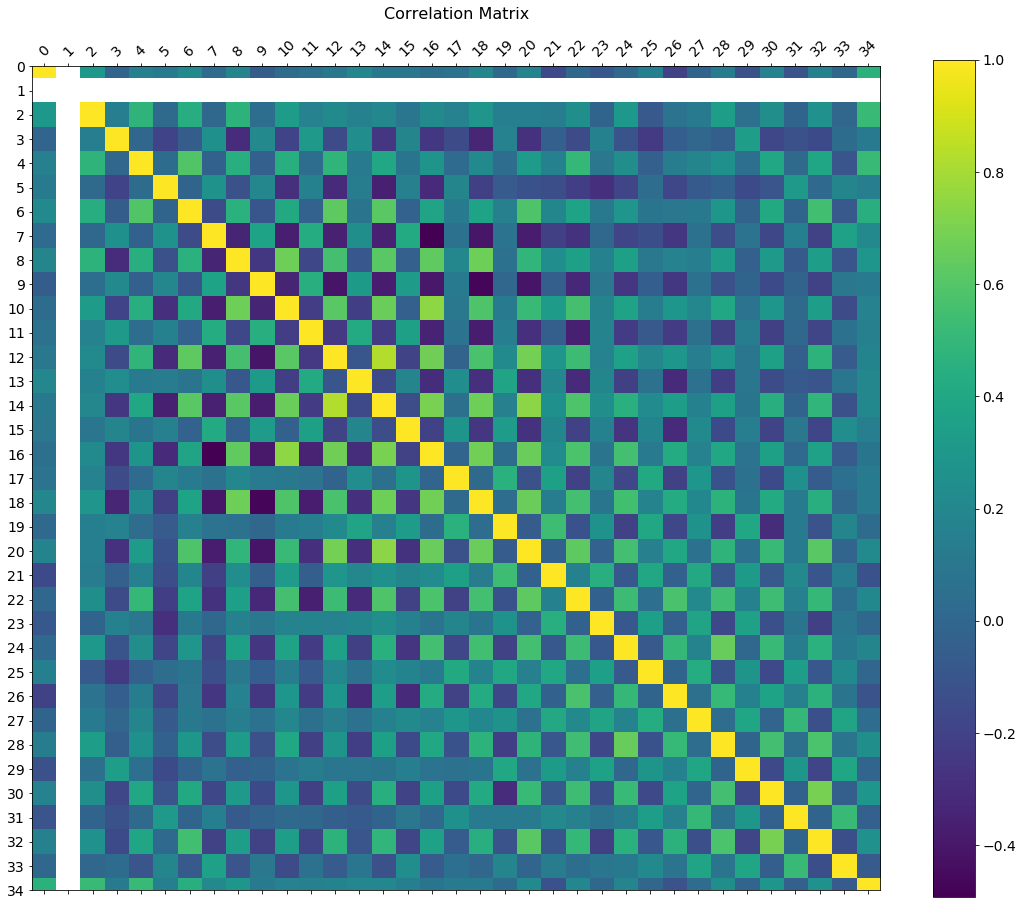

In [32]:
# Correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(ionosphere.corr(), fignum=f.number)
plt.xticks(range(ionosphere.shape[1]), ionosphere.columns, fontsize=14, rotation=45)
plt.yticks(range(ionosphere.shape[1]), ionosphere.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

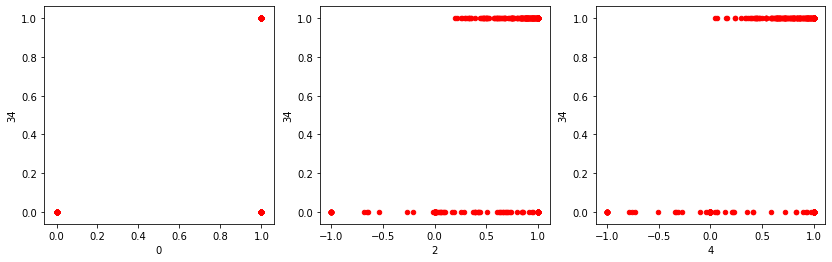

In [33]:
#plot scatter plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))

for xcol, ax in zip([0, 2,4], axes):
    ionosphere.plot(kind='scatter', x=xcol, y=34, ax=ax, alpha=1, color=['r'])

## Training model + testing

##### Preparing data for training and testing by adding a column of 1's and transforming to numpy array

In [34]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [35]:
import k_fold_validation_V3 as k3

In [36]:
print(k3.k_fold_validation(X, y, 0.01, 10000, 0))

(0.8292957746478873, 0.6780684104627767)


In [38]:
import k_fold_validation_V2 as k2

0.7526760563380283 3.6


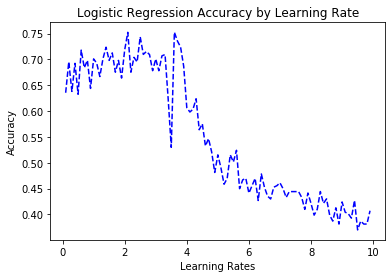

In [39]:
learn_vals = []
accuracies = []
max_acc = 0
max_learn = 0
for x in np.arange(0.1, 10, 0.1):
    acc = k2.k_fold_validation(X, y, x, 200, 0)
    learn_vals.append(x)
    accuracies.append(acc)
    if(acc > max_acc):
        max_acc = acc
        max_learn = x
print(max_acc, max_learn)
plt.plot(learn_vals,accuracies,'b--')
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy by Learning Rate')
plt.show()
    

In [40]:
import k_fold_validation_V3 as k3

In [41]:
print(k3.k_fold_validation(X, y, 10, 2500, 0))

(0.8377867203219316, 0.6780684104627767)


In [ ]:
num_itt = []
accuracies = []
max_acc = 0
max_itt = 0
for x in np.arange(100, 20000, 100):
    acc, temp = k3.k_fold_validation(X, y, 2.4, x, 0)
    num_itt.append(x)
    accuracies.append(acc)
    if(acc > max_acc):
        max_acc = acc
        max_itt = x
print(max_acc, max_itt)
plt.plot(num_itt,accuracies,'b--')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy by Number of Iterations')
plt.show()

In [ ]:
k_val = []
accuracies_nb = []
accuracies_l = []
max_acc_nb = 0
max_k_nb = 0
max_acc_l = 0
max_k_l = 0
for x in np.arange(2, 20, 1):
    acc_l, acc_nb = k3.k_fold_validation(X, y, 2.4, 13500, 0, x)
    k_val.append(x)
    accuracies_l.append(acc_l)
    accuracies_nb.append(acc_nb)
    if(acc_l > max_acc_l):
        max_acc_l = acc_l
        max_k_l = x
    if(acc_nb > max_acc_nb):
        max_acc_nb = acc_nb
        max_k_nb = x
print(max_acc_l, max_k_l, max_acc_nb, max_k_nb)
plt.plot(k_val,accuracies_l,'b--')
plt.plot(k_val,accuracies_nb,'bs')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Model Accuracies by K Values')
plt.legend(['Logistic', 'Naive Bayes'])
plt.show()

In [ ]:
num_itt = []
accuracies = []
max_acc = 0
max_itt = 0
for t in np.arange(2,20,2):
    for x in np.arange(100, 8000, 150):
        acc, temp = k3.k_fold_validation(X, y, 2.4, x, 0, t)
        if(acc > max_acc):
            max_acc = acc
            max_itt = x
print(max_acc, max_itt)
